### EDA for `ad_events.csv`

Before performing analysis an the success of different ads, we'll do some EDA on the ad event data to gain some initial insights

In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading all of the datasets
# will start with EDA just on ad_events but then merge the tables to analyze ad performance
path = os.getcwd()

events = pd.read_csv(path + '/data/ad_events.csv')
users = pd.read_csv(path + '/data/users.csv')

In [3]:
# show first five rows of events
events.head()

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression


From `users_eda.ipynb` there appears to be a small portion of user ids which represent two different users. We first how to find what proportion of events consists of ad events involving any of these repeated user ids

In [4]:
# find repeated user ids
temp = pd.DataFrame(users['user_id'].value_counts() > 1)
repeat_ids = list(temp[temp['count'] == True].index)

# filter events for ad events involving a repeat ids
repeat_events = events[events['user_id'].isin(repeat_ids)]
print(f'Ad events involving a repeat user id: {len(repeat_events)}')
print(f'Proportion of ad events involving a repeat id: {(100 * len(repeat_events) / len(events)):.2f}%')

Ad events involving a repeat user id: 3967
Proportion of ad events involving a repeat id: 0.99%


The proportion of ad events involving one of these repeated ids is less than one percent. Therefore, we can reasonably remove the entries of the dataset involving these ids and without adding a significant amount of bias. 

In [5]:
# filter events to exclude repeat user_ids
events = events[~events['user_id'].isin(repeat_ids)]

# ensure correct number of events are left (should be 396033)
print(f'Number of ad events after removing repeat user_ids: {len(events)}')

Number of ad events after removing repeat user_ids: 396033


In [50]:
# calculating statistics for combined visualization
days_count = events['day_of_week'].value_counts()
tod_count = events['time_of_day'].value_counts()

tod_daily = events[['day_of_week', 'time_of_day']].groupby(by = ['day_of_week', 'time_of_day']).size().reset_index(name = 'events')
tod_daily_pivot = tod_daily.pivot(index = 'day_of_week', columns = 'time_of_day', values = 'events')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tod_daily_pivot = tod_daily_pivot.reindex(day_order)

events_count = events['event_type'].value_counts().to_frame()
clicks = events_count.loc['Click'].iloc[0]
likes = events_count.loc['Like'].iloc[0]
comments = events_count.loc['Comment'].iloc[0]
purchases = events_count.loc['Purchase'].iloc[0]
shares = events_count.loc['Share'].iloc[0]
print(f'{len(events)} events\n{clicks} clicks\n{likes} likes\n{comments} comments\n{purchases} purchases\n{shares} shares')

396033 events
39663 clicks
11881 likes
4074 comments
2012 purchases
1936 shares


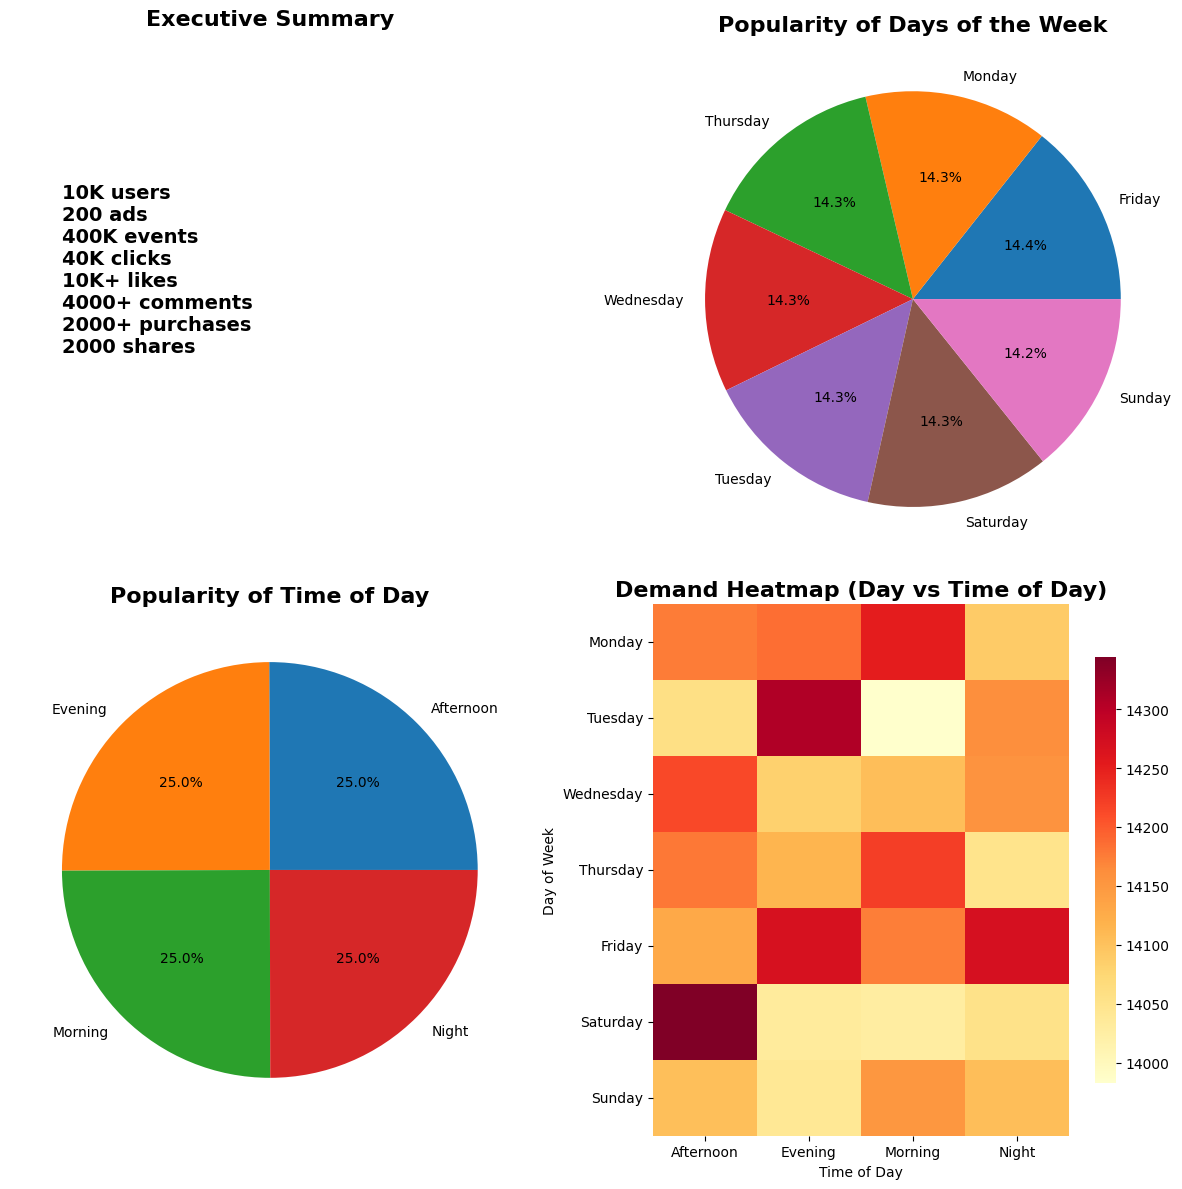

In [51]:
# combined eda visualization
fig = plt.figure(figsize = (12, 12))

# Executive Summary
plt.subplot(2, 2, 1)
plt.text(0.1, 0.4, '10K users\n200 ads\n400K events\n40K clicks\n10K+ likes\n4000+ comments\n2000+ purchases\n2000 shares',
         fontsize = 14, fontweight = 'bold')
plt.axis('off')
plt.title('Executive Summary', fontsize = 16, fontweight = 'bold')

# Distribution of Day of the Week
plt.subplot(2, 2, 2)
plt.pie(data = days_count, x = days_count.values, labels = days_count.index, autopct = '%1.1f%%')
plt.title('Popularity of Days of the Week', fontsize = 16, fontweight = 'bold')

# Distribution of Time of Day
plt.subplot(2, 2, 3)
plt.pie(data = tod_count, x = tod_count.values, labels = tod_count.index, autopct = '%1.1f%%')
plt.title('Popularity of Time of Day', fontsize = 16, fontweight = 'bold')

# Heatmap of Day of Week & Time of Day
plt.subplot(2, 2, 4)
sns.heatmap(tod_daily_pivot, cmap = 'YlOrRd', annot = False, fmt = 'd', cbar = True, 
           cbar_kws = {'shrink': 0.8})
plt.title('Demand Heatmap (Day vs Time of Day)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')

plt.tight_layout()